# Hardware Capabilities Evaluation Experiment

## Results Analysis

In [3]:
from modules.experiments.quantum_hardware_capabilities_evaluation import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set(style="whitegrid")

root_path = Path(Path().resolve()).parent.parent

experiment_path = root_path / "modules/experiments/quantum_hardware_capabilities_evaluation"
res_path = experiment_path / "results"
origin_df = load_dataframe(res_path)
main_c = "#8A1A8C"
second_c = "#1B998B"
third_c = "#DDEDAA"
my_gray = "#838383"
custom_palette = [main_c, second_c, third_c]

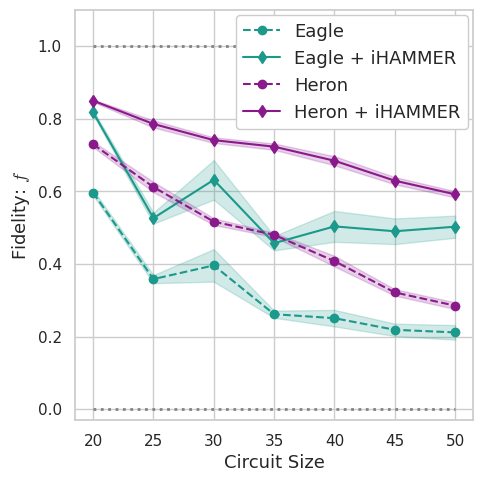

In [9]:
from matplotlib.font_manager import FontProperties

# Create the plot
plt.figure(figsize=(5, 5))
# Plot each line with different styles
df = filter_df(
    origin_df,
    backend_name=[("ibm_kyoto", "!="), ("ibm_sherbrooke", "!=")],
    n_states=[(128, "==")],
    opt_level=[(3, "==")],
    circuit=[("alternating", "==")],
    layers=[(2, "==")],
    num_qubits=[(15, ">")],
    sample_mode=[("sparse", "==")],
    shots=[(10000, "==")],
    mitigation_mode=None
)
x, y, sd = get_line(
    df[(df["mitigation_mode"] == "Raw") & (df["backend_name"] == "ibm_brisbane")], 
    "num_qubits", "fidelity")
plot_line(x, y, sd, "Eagle", marker='o', linestyle='--', color=second_c)
x, y, sd = get_line(
    df[(df["mitigation_mode"] == "Hammer") & (df["backend_name"] == "ibm_brisbane")], 
"num_qubits", "fidelity")
plot_line(x, y, sd, "Eagle + iHAMMER", marker='d', linestyle='-', color=second_c)
x, y, sd = get_line(
    df[(df["mitigation_mode"] == "Raw") & (df["backend_name"] == "ibm_fez")], "num_qubits", "fidelity")
plot_line(x, y, sd, "Heron", marker='o', linestyle='--', color=main_c)
x, y, sd = get_line(
    df[(df["mitigation_mode"] == "Hammer") & (df["backend_name"] == "ibm_fez")], "num_qubits", "fidelity")
plot_line(x, y, sd, "Heron + iHAMMER", marker='d', linestyle='-', color=main_c)
plt.ylim(-0.03, 1.1)
plt.hlines(y=1, xmin=min(df["num_qubits"]), xmax=max(df["num_qubits"]),
           linestyles=":",
           color=my_gray, lw=2)
plt.hlines(y=0, xmin=min(df["num_qubits"]), xmax=max(df["num_qubits"]),
           linestyles=":",
           color=my_gray, lw=2)
# plt.title("Sparse state: mitigation techniques comparison\n", fontsize=15)
custom_font = FontProperties(size=13, math_fontfamily="cm")
plt.ylabel(r"Fidelity: $f$", fontproperties=custom_font)
plt.xlabel("Circuit Size", fontsize=13)
plt.legend(
#           loc= (0., 0.),
           loc= (0.405, 0.71),
           framealpha=1,
           # title='Mit. Mode:', 
           fontsize=13, title_fontsize='15')
plt.tight_layout()
plt.savefig(res_path / "sparse_state_results_f.pdf")
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(7, 8))

df = filter_df(
    origin_df,
    backend_name=[("ibm_kyoto", "!="), ("ibm_sherbrooke", "!=")],
    n_states=[(128, "==")],
    opt_level=[(3, "==")],
    circuit=[("alternating", "==")],
    layers=[(2, "==")],
    num_qubits=[(15, ">")],
    sample_mode=[("zero", "==")],
    shots=[(10000, "==")],
    mitigation_mode=None
)
x, y, sd = get_line(
    df[(df["mitigation_mode"] == "Raw") & (df["backend_name"] == "ibm_brisbane")], 
    "num_qubits", "fidelity")
plot_line(x, y, sd, "ibm_brisbane - Raw", marker='o', linestyle='-')
x, y, sd = get_line(
    df[(df["mitigation_mode"] == "Hammer") & (df["backend_name"] == "ibm_brisbane")], 
"num_qubits", "fidelity")
plot_line(x, y, sd, "ibm_brisbane - Hammer", marker='d', linestyle='-')
x, y, sd = get_line(
    df[(df["mitigation_mode"] == "Raw") & (df["backend_name"] == "ibm_fez")], "num_qubits", "fidelity")
plot_line(x, y, sd, "ibm_fez - Raw", marker='o', linestyle='-.')
x, y, sd = get_line(
    df[(df["mitigation_mode"] == "Hammer") & (df["backend_name"] == "ibm_fez")], "num_qubits", "fidelity")
plot_line(x, y, sd, "ibm_fez - Hammer", marker='d', linestyle='-.')
plt.ylim(-0.1, 1.1)
plt.hlines(y=1, xmin=min(df["num_qubits"]), xmax=max(df["num_qubits"]),
           linestyles=":",
           color="green")
plt.hlines(y=0, xmin=min(df["num_qubits"]), xmax=max(df["num_qubits"]),
           linestyles=":",
           color="red")
plt.title("Single sample state: mitigation techniques comparison\n",
          fontsize=20)
plt.ylabel("Fidelity", fontsize=15)
plt.xlabel("Qubits", fontsize=15)
plt.legend(title='Mit. Mode:', fontsize=12, title_fontsize='13')
plt.tight_layout()
plt.savefig(res_path / "zero_state_results.png", dpi=600)
plt.show()
plt.close()

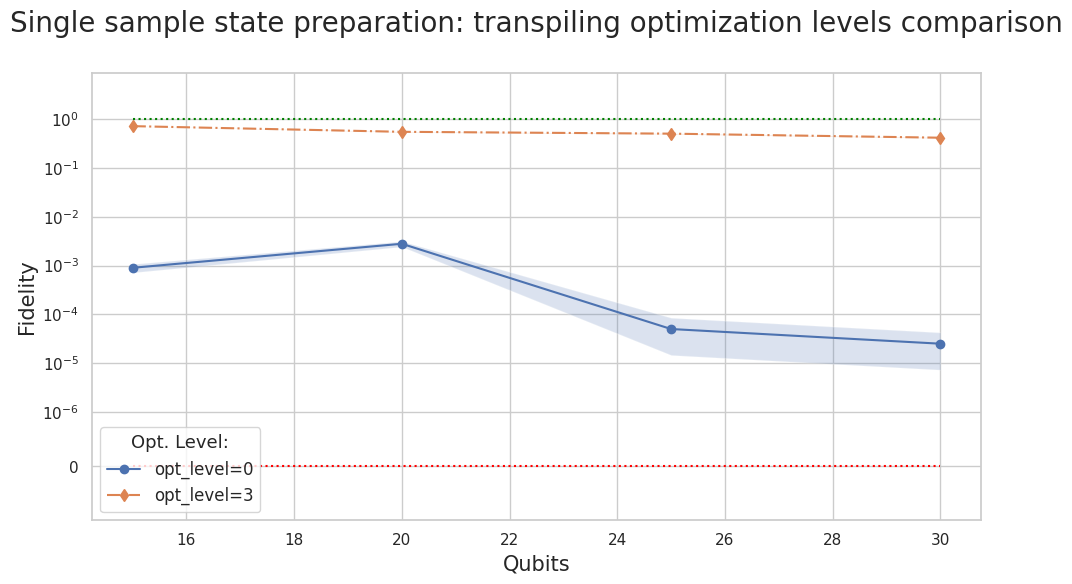

In [8]:
plt.figure(figsize=(10, 6))

# Plot each line with different styles
df = filter_df(
    origin_df,
    backend_name=[("ibm_kyoto", "==")],
    n_states=[(None, None)],
    # opt_level=[(3, "==")],
    circuit=[("alternating", "==")],
    layers=[(2, "==")],
    num_qubits=[(30, "<=")],
    sample_mode=[("zero", "==")],
    shots=[(20000, "==")],
    mitigation_mode=[("Raw", "==")]
)
x, y, sd = get_line(df[df["opt_level"] == 0], "num_qubits", "fidelity")
plot_line(x, y, sd, "opt_level=0", marker='o', linestyle='-')
x, y, sd = get_line(df[df["opt_level"] == 3], "num_qubits", "fidelity")
plot_line(x, y, sd, "opt_level=3", marker='d', linestyle='-.')
plt.ylim(-0.1, 1.1)
plt.hlines(y=1, xmin=min(df["num_qubits"]), xmax=max(df["num_qubits"]),
           linestyles=":",
           color="green")
plt.hlines(y=0, xmin=min(df["num_qubits"]), xmax=max(df["num_qubits"]),
           linestyles=":",
           color="red")
plt.title("Single sample state preparation: transpiling optimization levels "
          "comparison\n",
          fontsize=20)
plt.ylabel("Fidelity", fontsize=15)
plt.xlabel("Qubits", fontsize=15)
plt.legend(title='Opt. Level:', fontsize=12, title_fontsize='13')
plt.ylim(-10 ** -6, 9)
plt.yscale("symlog", linthresh=10 ** -6)
plt.tight_layout()
plt.savefig(res_path / "opt_levels_comparison.png", dpi=600)
plt.show()
plt.close()

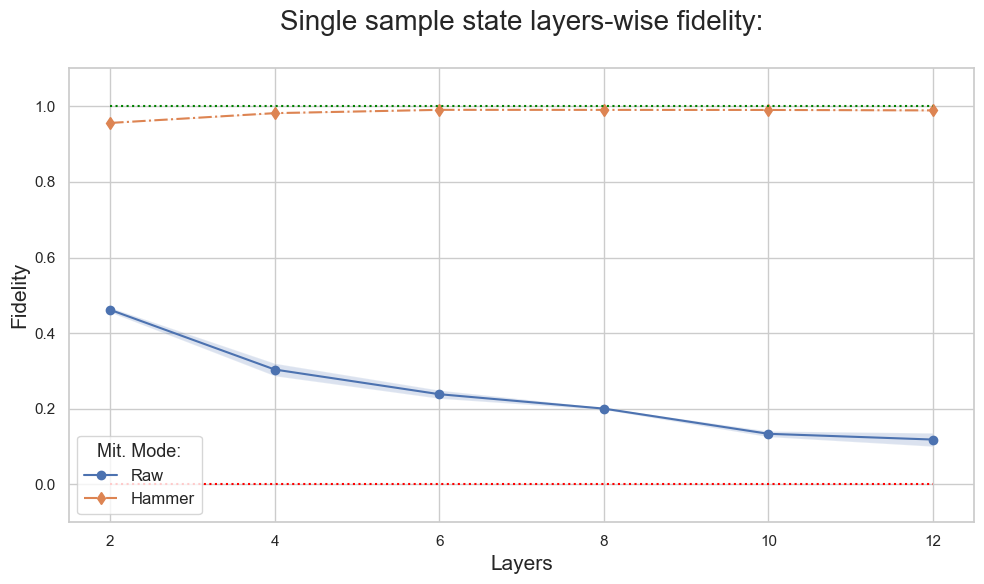

In [14]:
plt.figure(figsize=(10, 6))

# Plot each line with different styles
df = filter_df(
    origin_df,
    backend_name=[("ibm_brisbane", "==")],
    n_states=[(128, "==")],
    opt_level=[(3, "==")],
    circuit=[("alternating", "==")],
    # layers=[(2, "==")],
    num_qubits=[(30, "==")],
    sample_mode=[("zero", "==")],
    shots=[(10000, "==")],
    mitigation_mode=None
)
x, y, sd = get_line(
    df[df["mitigation_mode"] == "Raw"], "layers", "fidelity")
plot_line(x, y, sd, "Raw", marker='o', linestyle='-')
x, y, sd = get_line(
    df[df["mitigation_mode"] == "Hammer"], "layers", "fidelity")
plot_line(x, y, sd, "Hammer", marker='d', linestyle='-.')
# x, y, sd = get_line(
#     df[df["mitigation_mode"] == "Hammer+Dep"], "layers", "fidelity")
# plot_line(x, y, sd, "Hammer+Dep", marker='v', linestyle='--')
plt.ylim(-0.1, 1.1)
plt.hlines(y=1, xmin=min(df["layers"]), xmax=max(df["layers"]),
           linestyles=":",
           color="green")
plt.hlines(y=0, xmin=min(df["layers"]), xmax=max(df["layers"]),
           linestyles=":",
           color="red")
plt.title("Single sample state layers-wise fidelity:\n",
          fontsize=20)
plt.ylabel("Fidelity", fontsize=15)
plt.xlabel("Layers", fontsize=15)
plt.legend(title='Mit. Mode:', fontsize=12, title_fontsize='13')
plt.tight_layout()
plt.savefig(res_path / "layers.png", dpi=600)
plt.show()
plt.close()

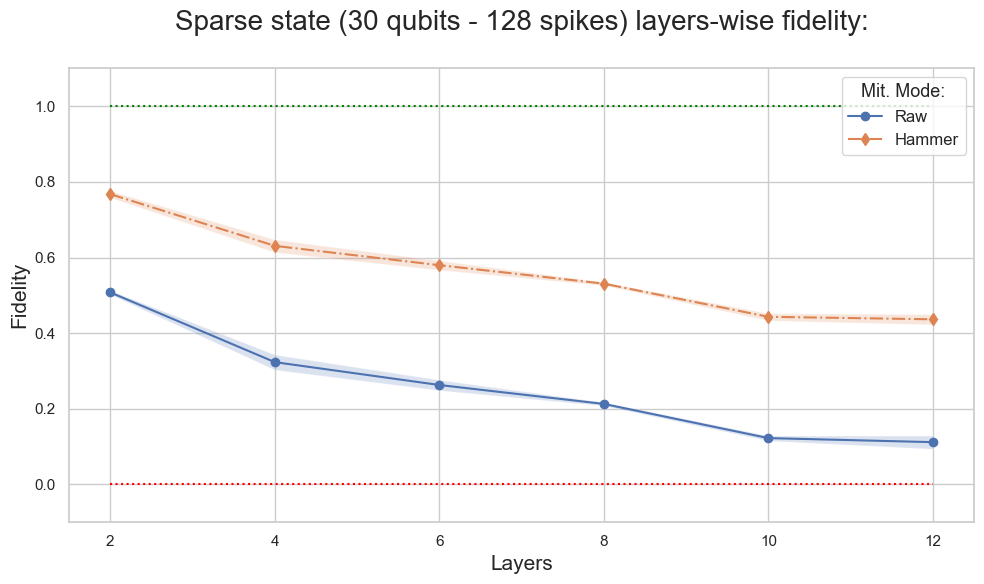

In [15]:
plt.figure(figsize=(10, 6))

# Plot each line with different styles
df = filter_df(
    origin_df,
    backend_name=[("ibm_brisbane", "==")],
    n_states=[(128, "==")],
    opt_level=[(3, "==")],
    circuit=[("alternating", "==")],
    # layers=[(2, "==")],
    num_qubits=[(30, "==")],
    sample_mode=[("sparse", "==")],
    shots=[(10000, "==")],
    mitigation_mode=None
)
x, y, sd = get_line(
    df[df["mitigation_mode"] == "Raw"], "layers", "fidelity")
plot_line(x, y, sd, "Raw", marker='o', linestyle='-')
x, y, sd = get_line(
    df[df["mitigation_mode"] == "Hammer"], "layers", "fidelity")
plot_line(x, y, sd, "Hammer", marker='d', linestyle='-.')
plt.ylim(-0.1, 1.1)
plt.hlines(y=1, xmin=min(df["layers"]), xmax=max(df["layers"]),
           linestyles=":",
           color="green")
plt.hlines(y=0, xmin=min(df["layers"]), xmax=max(df["layers"]),
           linestyles=":",
           color="red")
plt.title(f"Sparse state (30 qubits - 128 spikes) layers-wise fidelity:\n",
          fontsize=20)
plt.ylabel("Fidelity", fontsize=15)
plt.xlabel("Layers", fontsize=15)
plt.legend(title='Mit. Mode:', fontsize=12, title_fontsize='13')
plt.tight_layout()
plt.savefig(res_path / "layers_sparse.png", dpi=600)
plt.show()
plt.close()

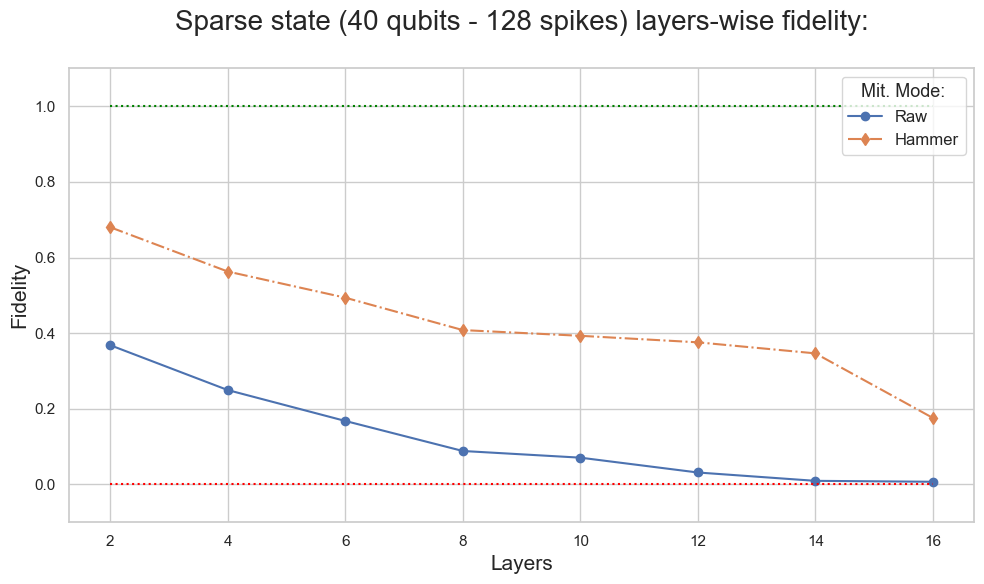

In [21]:
plt.figure(figsize=(10, 6))

# Plot each line with different styles
df = filter_df(
    origin_df,
    backend_name=[("ibm_brisbane", "==")],
    n_states=[(128, "==")],
    opt_level=[(3, "==")],
    circuit=[("alternating", "==")],
    # layers=[(2, "==")],
    num_qubits=[(40, "==")],
    sample_mode=[("sparse", "==")],
    shots=[(10000, "==")],
    mitigation_mode=None
)
x, y, sd = get_line(
    df[df["mitigation_mode"] == "Raw"], "layers", "fidelity")
plot_line(x, y, sd, "Raw", marker='o', linestyle='-')
x, y, sd = get_line(
    df[df["mitigation_mode"] == "Hammer"], "layers", "fidelity")
plot_line(x, y, sd, "Hammer", marker='d', linestyle='-.')
plt.ylim(-0.1, 1.1)
plt.hlines(y=1, xmin=min(df["layers"]), xmax=max(df["layers"]),
           linestyles=":",
           color="green")
plt.hlines(y=0, xmin=min(df["layers"]), xmax=max(df["layers"]),
           linestyles=":",
           color="red")
plt.title(f"Sparse state (40 qubits - 128 spikes) layers-wise fidelity:\n",
          fontsize=20)
plt.ylabel("Fidelity", fontsize=15)
plt.xlabel("Layers", fontsize=15)
plt.legend(title='Mit. Mode:', fontsize=12, title_fontsize='13')
plt.tight_layout()
plt.savefig(res_path / "layers_sparse_40.png", dpi=600)
plt.show()
plt.close()

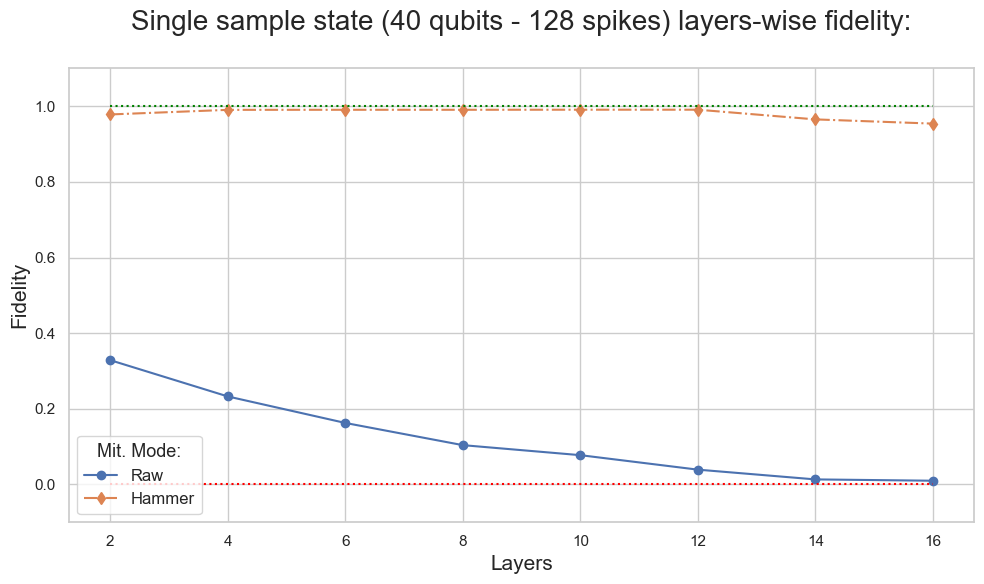

In [22]:
plt.figure(figsize=(10, 6))

# Plot each line with different styles
df = filter_df(
    origin_df,
    backend_name=[("ibm_brisbane", "==")],
    n_states=[(128, "==")],
    opt_level=[(3, "==")],
    circuit=[("alternating", "==")],
    # layers=[(2, "==")],
    num_qubits=[(40, "==")],
    sample_mode=[("zero", "==")],
    shots=[(10000, "==")],
    mitigation_mode=None
)
x, y, sd = get_line(
    df[df["mitigation_mode"] == "Raw"], "layers", "fidelity")
plot_line(x, y, sd, "Raw", marker='o', linestyle='-')
x, y, sd = get_line(
    df[df["mitigation_mode"] == "Hammer"], "layers", "fidelity")
plot_line(x, y, sd, "Hammer", marker='d', linestyle='-.')
plt.ylim(-0.1, 1.1)
plt.hlines(y=1, xmin=min(df["layers"]), xmax=max(df["layers"]),
           linestyles=":",
           color="green")
plt.hlines(y=0, xmin=min(df["layers"]), xmax=max(df["layers"]),
           linestyles=":",
           color="red")
plt.title(f"Single sample state (40 qubits - 128 spikes) layers-wise "
          f"fidelity:\n",
          fontsize=20)
plt.ylabel("Fidelity", fontsize=15)
plt.xlabel("Layers", fontsize=15)
plt.legend(title='Mit. Mode:', fontsize=12, title_fontsize='13')
plt.tight_layout()
plt.savefig(res_path / "layers_40.png", dpi=600)
plt.show()
plt.close()